In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score

In [ ]:
auth.authenticate_user()
google_auth = GoogleAuth()
google_auth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(google_auth)

In [ ]:
downloaded = drive.CreateFile({'id':"1ubVy7bKaVbglr4ln9iuxLtzDQI5yNhWw"})   # replace the id with id of file you want to access
downloaded.GetContentFile('creditcard.csv')        # replace with your dataset file

In [ ]:
data = pd.read_csv("creditcard.csv") 
print (data.shape)
data.head(3)#Gives top 3 rows of dataset

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
label_names = {0:'Not Fraud', 1:'Fraud'}
print(data.Class.value_counts().rename(index = label_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


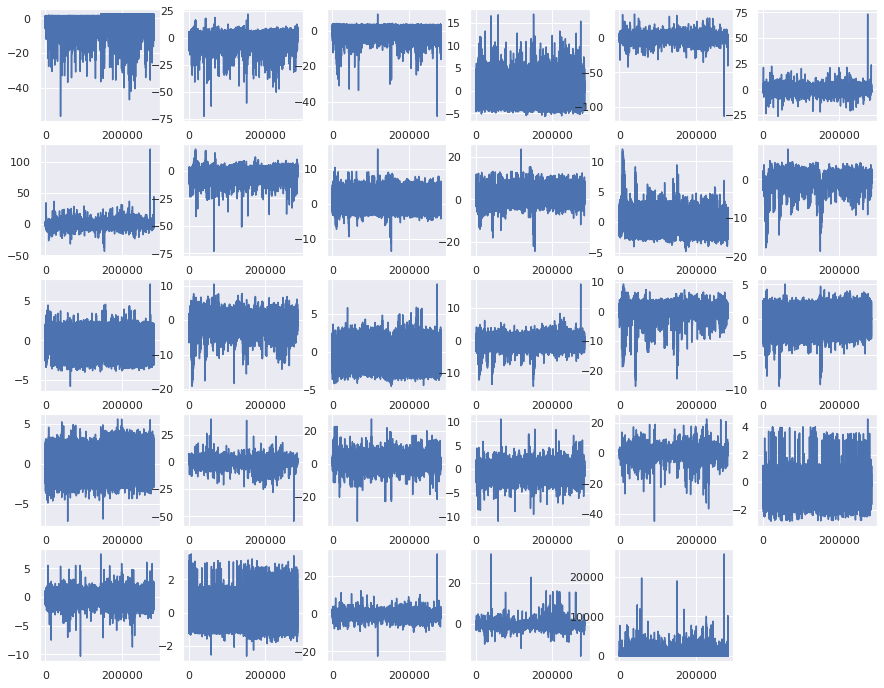

In [ ]:

plott = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(data.V1) ; plt.subplot(5, 6, 15) ; plt.plot(data.V15)
plt.subplot(5, 6, 2) ; plt.plot(data.V2) ; plt.subplot(5, 6, 16) ; plt.plot(data.V16)
plt.subplot(5, 6, 3) ; plt.plot(data.V3) ; plt.subplot(5, 6, 17) ; plt.plot(data.V17)
plt.subplot(5, 6, 4) ; plt.plot(data.V4) ; plt.subplot(5, 6, 18) ; plt.plot(data.V18)
plt.subplot(5, 6, 5) ; plt.plot(data.V5) ; plt.subplot(5, 6, 19) ; plt.plot(data.V19)
plt.subplot(5, 6, 6) ; plt.plot(data.V6) ; plt.subplot(5, 6, 20) ; plt.plot(data.V20)
plt.subplot(5, 6, 7) ; plt.plot(data.V7) ; plt.subplot(5, 6, 21) ; plt.plot(data.V21)
plt.subplot(5, 6, 8) ; plt.plot(data.V8) ; plt.subplot(5, 6, 22) ; plt.plot(data.V22)
plt.subplot(5, 6, 9) ; plt.plot(data.V9) ; plt.subplot(5, 6, 23) ; plt.plot(data.V23)
plt.subplot(5, 6, 10) ; plt.plot(data.V10) ; plt.subplot(5, 6, 24) ; plt.plot(data.V24)
plt.subplot(5, 6, 11) ; plt.plot(data.V11) ; plt.subplot(5, 6, 25) ; plt.plot(data.V25)
plt.subplot(5, 6, 12) ; plt.plot(data.V12) ; plt.subplot(5, 6, 26) ; plt.plot(data.V26)
plt.subplot(5, 6, 13) ; plt.plot(data.V13) ; plt.subplot(5, 6, 27) ; plt.plot(data.V27)
plt.subplot(5, 6, 14) ; plt.plot(data.V14) ; plt.subplot(5, 6, 28) ; plt.plot(data.V28)
plt.subplot(5, 6, 29) ; plt.plot(data.Amount)
plt.show()

In [ ]:
 features = data.iloc[:, 1:30].columns
aim = data.iloc[:1, 30: ].columns
print(features)
print(aim)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [ ]:
info_features = data[features]
info_target = data[aim]

In [ ]:
trainX, testX, trainY, testY = train_test_split(info_features, info_target, train_size=0.50, test_size=0.50, random_state=1)
print("Length of trainX is: {trainX}".format(trainX = len(trainX)))
print("Length of testX is: {testX}".format(testX = len(testX)))
print("Length of trainY is: {trainY}".format(trainY = len(trainY)))
print("Length of testY is: {testY}".format(testY = len(testY)))

Length of trainX is: 142403
Length of testX is: 142404
Length of trainY is: 142403
Length of testY is: 142404


In [ ]:
FD_model = LogisticRegression()
FD_model.fit(trainX, trainY.values.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = FD_model.predict(testX)

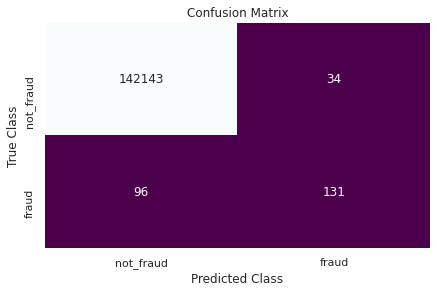

In [ ]:
label_names = ['not_fraud', 'fraud']
C_matrix = confusion_matrix(testY, prediction)
# Create pandas dataframe
dataframe = pd.DataFrame(C_matrix, index=label_names, columns=label_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="BuPu_r", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


In [ ]:
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(testY, prediction), 2)
recall_score = round(recall_score(testY, prediction), 2)
precision_score=round(precision_score(testY,prediction), 2)
print("Precision for Logistic Regression Model 1 : {precision_score}".format(precision_score = precision_score))
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))
print(accuracy_score(testY, prediction))

Precision for Logistic Regression Model 1 : 0.79
Sensitivity/Recall for Logistic Regression Model 1 : 0.58
F1 Score for Logistic Regression Model 1 : 0.67
0.9990871042948232


Length of trainX is: 170884
Length of testX is: 113923
Length of trainY is: 170884
Length of testY is: 113923


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


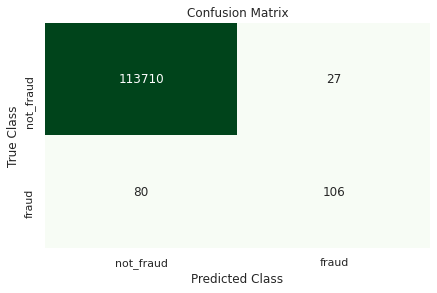

In [ ]:
#For train_size=0.60, test_size=0.40
trainX, testX, trainY, testY = train_test_split(info_features, info_target, train_size=0.60, test_size=0.40, random_state=1)
print("Length of trainX is: {trainX}".format(trainX = len(trainX)))
print("Length of testX is: {testX}".format(testX = len(testX)))
print("Length of trainY is: {trainY}".format(trainY = len(trainY)))
print("Length of testY is: {testY}".format(testY = len(testY)))
FD_model = LogisticRegression()
FD_model.fit(trainX, trainY.values.ravel())

prediction = FD_model.predict(testX)
label_names = ['not_fraud', 'fraud']
C_matrix = confusion_matrix(testY, prediction)
# Create pandas dataframe
dataframe = pd.DataFrame(C_matrix, index=label_names, columns=label_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


In [ ]:



from sklearn.metrics import f1_score, recall_score,precision_score
f1_score = round(f1_score(testY, prediction), 2)
recall_score = round(recall_score(testY, prediction), 2)
precision_score=round(precision_score(testY,prediction), 2)
print("Precision for Logistic Regression Model 1 : {precision_score}".format(precision_score = precision_score))
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))
print(accuracy_score(testY, prediction))

Precision for Logistic Regression Model 1 : 0.8
Sensitivity/Recall for Logistic Regression Model 1 : 0.57
F1 Score for Logistic Regression Model 1 : 0.66
0.9990607691159819


Length of trainX is: 227845
Length of testX is: 56962
Length of trainY is: 227845
Length of testY is: 56962


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


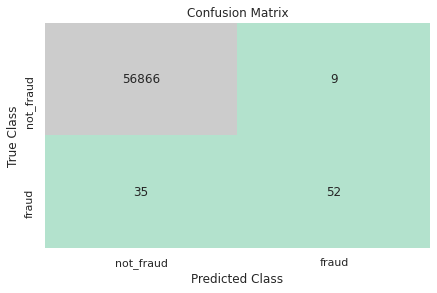

Precision for Logistic Regression Model 1 : 0.85
Sensitivity/Recall for Logistic Regression Model 1 : 0.6
F1 Score for Logistic Regression Model 1 : 0.7
0.9992275552122467


In [ ]:
#For train_size=0.80, test_size=0.20
trainX, testX, trainY, testY = train_test_split(info_features, info_target, train_size=0.80, test_size=0.20, random_state=1)
print("Length of trainX is: {trainX}".format(trainX = len(trainX)))
print("Length of testX is: {testX}".format(testX = len(testX)))
print("Length of trainY is: {trainY}".format(trainY = len(trainY)))
print("Length of testY is: {testY}".format(testY = len(testY)))
FD_model = LogisticRegression()
FD_model.fit(trainX, trainY.values.ravel())
prediction = FD_model.predict(testX)
label_names = ['not_fraud', 'fraud']
C_matrix = confusion_matrix(testY, prediction)
# Create pandas dataframe
dataframe = pd.DataFrame(C_matrix, index=label_names, columns=label_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Pastel2", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()
from sklearn.metrics import f1_score, recall_score,precision_score
f1_score = round(f1_score(testY, prediction), 2)
recall_score = round(recall_score(testY, prediction), 2)
precision_score=round(precision_score(testY,prediction), 2)
print("Precision for Logistic Regression Model 1 : {precision_score}".format(precision_score = precision_score))
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))
print(accuracy_score(testY, prediction))


Length of trainX is: 199364
Length of testX is: 85443
Length of trainY is: 199364
Length of testY is: 85443


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


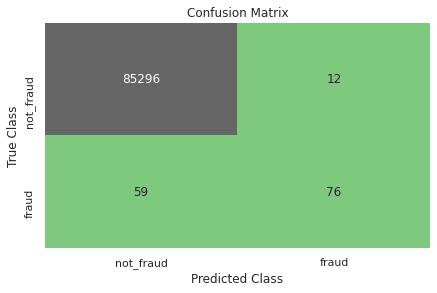

Precision for Logistic Regression Model 1 : 0.86
Sensitivity/Recall for Logistic Regression Model 1 : 0.56
F1 Score for Logistic Regression Model 1 : 0.68
0.99916903666772


In [ ]:
#For train_size=0.70, test_size=0.30
trainX, testX, trainY, testY = train_test_split(info_features, info_target, train_size=0.70, test_size=0.30, random_state=1)
print("Length of trainX is: {trainX}".format(trainX = len(trainX)))
print("Length of testX is: {testX}".format(testX = len(testX)))
print("Length of trainY is: {trainY}".format(trainY = len(trainY)))
print("Length of testY is: {testY}".format(testY = len(testY)))
FD_model = LogisticRegression()
FD_model.fit(trainX, trainY.values.ravel())
prediction = FD_model.predict(testX)
label_names = ['not_fraud', 'fraud']
C_matrix = confusion_matrix(testY, prediction)
# Create pandas dataframe
dataframe = pd.DataFrame(C_matrix, index=label_names, columns=label_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Accent", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()
from sklearn.metrics import f1_score, recall_score,precision_score
f1_score = round(f1_score(testY, prediction), 2)
recall_score = round(recall_score(testY, prediction), 2)
precision_score=round(precision_score(testY,prediction), 2)
print("Precision for Logistic Regression Model 1 : {precision_score}".format(precision_score = precision_score))
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))
print(accuracy_score(testY, prediction))
